In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Loading data into DataFrame...
Total rows in dataset: 40829
0    109391000.0
1    112505000.0
2     79370000.0
3     57433000.0
4     67720000.0
5     75300000.0
6     89200000.0
7     54700000.0
8     31200000.0
9     10300000.0
Name: CashAndCashEquivalentsAtCarryingValue, dtype: float64

Columns statistics (excluding original keys):
CashAndCashEquivalentsAtCarryingValue: nulls = 3708, percentage_nulls = 9.08%, mean = 741289444.82, median = 120194000.00, std = 5681199076.83
IncomeTaxExpenseBenefit: nulls = 5181, percentage_nulls = 12.69%, mean = 128725331.05, median = 14080500.00, std = 893249555.78
EntityPublicFloat: nulls = 5964, percentage_nulls = 14.61%, mean = 141769557881427.03, median = 1300000000.00, std = 11288612215373270.00
StockholdersEquity: nulls = 6097, percentage_nulls = 14.93%, mean = 3090387047.00, median = 625959000.00, std = 13574309964.94
Assets: nulls = 6352, percentage_nulls = 15.56%, mean = 16520168618.55, median = 2215491000.00, std = 111529180597.96
NetIncome

C:\Users\Angelo\AppData\Local\Temp\ipykernel_7264\1938995108.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=columns_to_plot_df, x='percentage_nulls', y='column', palette='viridis')


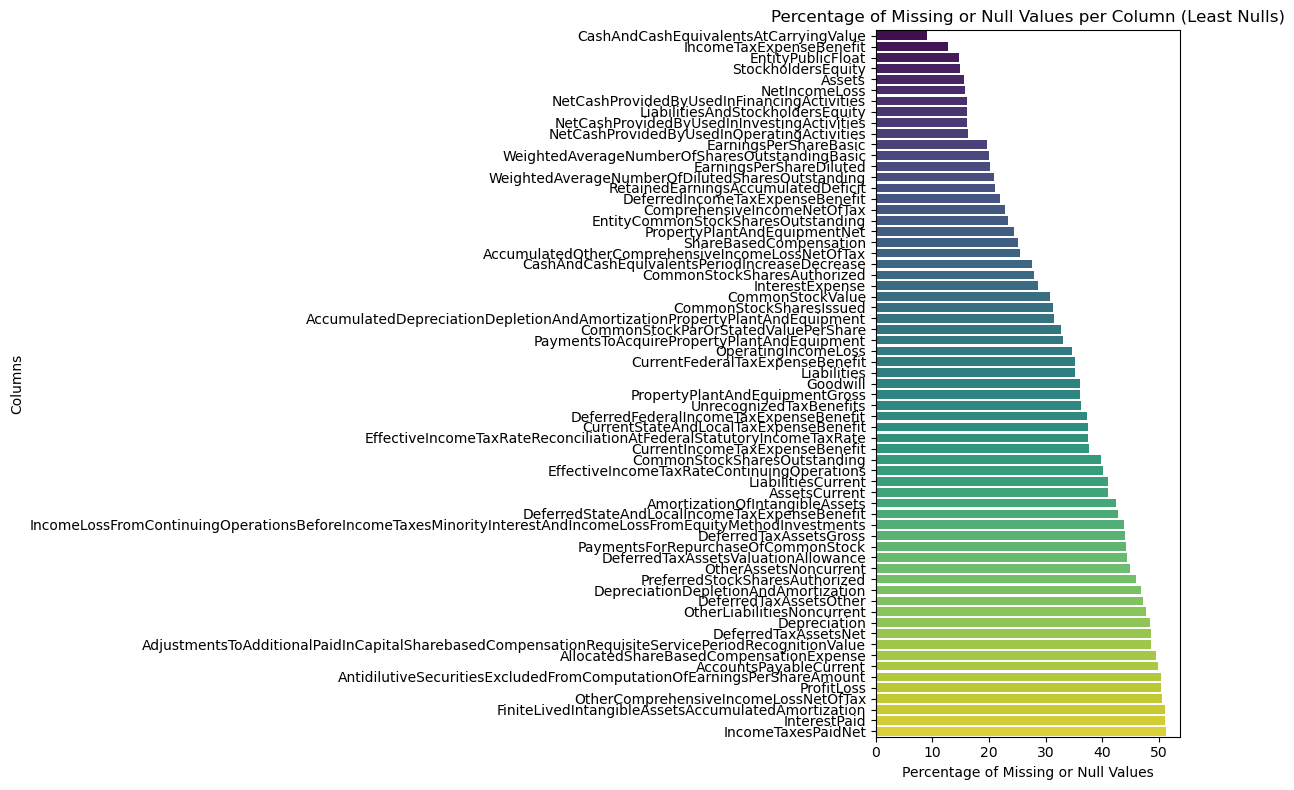

In [6]:

filename = './outputs/ecl_filtered.json'

print("Loading data into DataFrame...")

# Load the entire dataset
df = pd.read_json(filename, lines=True)

print(f"Total rows in dataset: {len(df)}")

# List of original columns to exclude from analysis
original_keys = [
    'bankruptcy_date_1', 'label', 'bankruptcy_date_2', 'filing_date', 'datadate',
    'bankruptcy_date_3', 'opinion_text', 'item_7', 'bankruptcy_prediction_split',
    'cik', 'company', 'period_of_report', 'cik_year', 'qualified', 'gc_list',
    'can_label', 'filename', 'gvkey'
]

# Get the list of columns to analyze (excluding original_keys)
columns_to_analyze = [col for col in df.columns if col not in original_keys]

# Initialize a list to hold the statistics
columns_stats = []

# print(df.head(10))
print(df["CashAndCashEquivalentsAtCarryingValue"].head(10))

for col in columns_to_analyze:
    null_count = df[col].isnull().sum()
    total_count = len(df)
    percentage_nulls = (null_count / total_count) * 100
    
    # Initialize mean, median, std to None
    mean_value = None
    median_value = None
    std_value = None
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # Compute statistics on non-null values
        mean_value = df[col].mean()
        median_value = df[col].median()
        std_value = df[col].std()
    
    columns_stats.append({
        'column': col,
        'null_count': null_count,
        'percentage_nulls': percentage_nulls,
        'mean': mean_value,
        'median': median_value,
        'std': std_value
    })

# Convert to DataFrame
columns_stats_df = pd.DataFrame(columns_stats)

# Sort by percentage_nulls in ascending order (least nulls first)
columns_stats_df = columns_stats_df.sort_values(by='percentage_nulls')

print("\nColumns statistics (excluding original keys):")
for idx, row in columns_stats_df.iterrows():
    print(f"{row['column']}: nulls = {row['null_count']}, percentage_nulls = {row['percentage_nulls']:.2f}%, mean = {row['mean']:.2f}, median = {row['median']:.2f}, std = {row['std']:.2f}")

# Plotting the distribution of null percentages for columns with the least nulls
# Optionally limit the number of columns plotted
max_columns_to_plot = 65  # Adjust as needed
columns_to_plot_df = columns_stats_df.head(max_columns_to_plot)

plt.figure(figsize=(12, 8))
sns.barplot(data=columns_to_plot_df, x='percentage_nulls', y='column', palette='viridis')
plt.title('Percentage of Missing or Null Values per Column (Least Nulls)')
plt.xlabel('Percentage of Missing or Null Values')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [7]:
print(df["CashAndCashEquivalentsAtCarryingValue"].head(10))
# print(df["cik"].head(10))
# print(df["company"].head(10))
print(df["period_of_report"].head(10))

0    109391000.0
1    112505000.0
2     79370000.0
3     57433000.0
4     67720000.0
5     75300000.0
6     89200000.0
7     54700000.0
8     31200000.0
9     10300000.0
Name: CashAndCashEquivalentsAtCarryingValue, dtype: float64
0    2008-05-31
1    2009-05-31
2    2010-05-31
3    2011-05-31
4    2012-05-31
5    2013-05-31
6    2014-05-31
7    2015-05-31
8    2016-05-31
9    2017-05-31
Name: period_of_report, dtype: object


In [8]:
# Testing dense submatrix
# Set a threshold for maximum acceptable percentage of nulls
max_null_percentage = 20

# Filter columns that meet the threshold
dense_columns = columns_stats_df[columns_stats_df['percentage_nulls'] <= max_null_percentage]['column'].tolist()

# Create a submatrix with these columns
dense_submatrix = df[dense_columns]

# Optionally drop rows with any remaining nulls in these columns
dense_submatrix = dense_submatrix.dropna(subset=dense_columns)

print(f"\nDense submatrix shape: {dense_submatrix.shape}")
dense_submatrix.head(20)


Dense submatrix shape: (23358, 11)


,CashAndCashEquivalentsAtCarryingValue,IncomeTaxExpenseBenefit,EntityPublicFloat,StockholdersEquity,Assets,NetIncomeLoss,NetCashProvidedByUsedInFinancingActivities,LiabilitiesAndStockholdersEquity,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,EarningsPerShareBasic
2,7.937000e+07,22190000.0,9.345680e+08,7.469060e+08,1.501042e+09,4.462800e+07,3.617000e+07,1.501042e+09,-2.223400e+08,1.531560e+08,1.17
3,5.743300e+07,35364000.0,9.345680e+08,8.358450e+08,1.703727e+09,6.982600e+07,-1.182700e+07,1.703727e+09,-1.187350e+08,1.085980e+08,1.76
4,6.772000e+07,25480000.0,6.995378e+08,8.646000e+08,2.195653e+09,6.772300e+07,3.068000e+08,2.195653e+09,-3.902000e+08,9.420000e+07,1.68
5,7.530000e+07,26700000.0,5.780988e+08,9.186000e+08,2.136900e+09,5.500000e+07,-1.237000e+08,2.136900e+09,-3.280000e+07,1.629000e+08,1.38
6,8.920000e+07,32100000.0,9.620000e+08,9.995000e+08,2.199500e+09,7.290000e+07,-8.590000e+07,2.199500e+09,-4.090000e+07,1.398000e+08,1.85
7,5.470000e+07,-28500000.0,8.060000e+08,8.451000e+08,1.515000e+09,1.020000e+07,-6.781000e+08,1.515000e+09,6.892000e+08,-4.300000e+07,0.26
15,1.530000e+08,-284000000.0,2.300000e+09,-3.489000e+09,2.543800e+10,-1.468000e+09,1.755000e+09,2.543800e+10,-2.723000e+09,9.300000e+08,-4.99
16,1.680000e+08,-35000000.0,1.800000e+09,-3.945000e+09,2.508800e+10,-4.710000e+08,8.040000e+08,2.508800e+10,-2.030000e+09,1.241000e+09,-1.41
17,2.830000e+08,0.0,3.352716e+08,-7.111000e+09,2.384800e+10,-1.979000e+09,7.270000e+08,2.384800e+10,-1.292000e+09,6.800000e+08,-5.91
18,4.800000e+08,-569000000.0,1.350000e+09,-7.987000e+09,2.351000e+10,-1.876000e+09,4.890000e+08,2.351000e+10,-1.571000e+09,1.279000e+09,-5.60



Dense submatrix shape: (0, 4000)


c:\Users\Angelo\anaconda3\envs\deep-learning\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


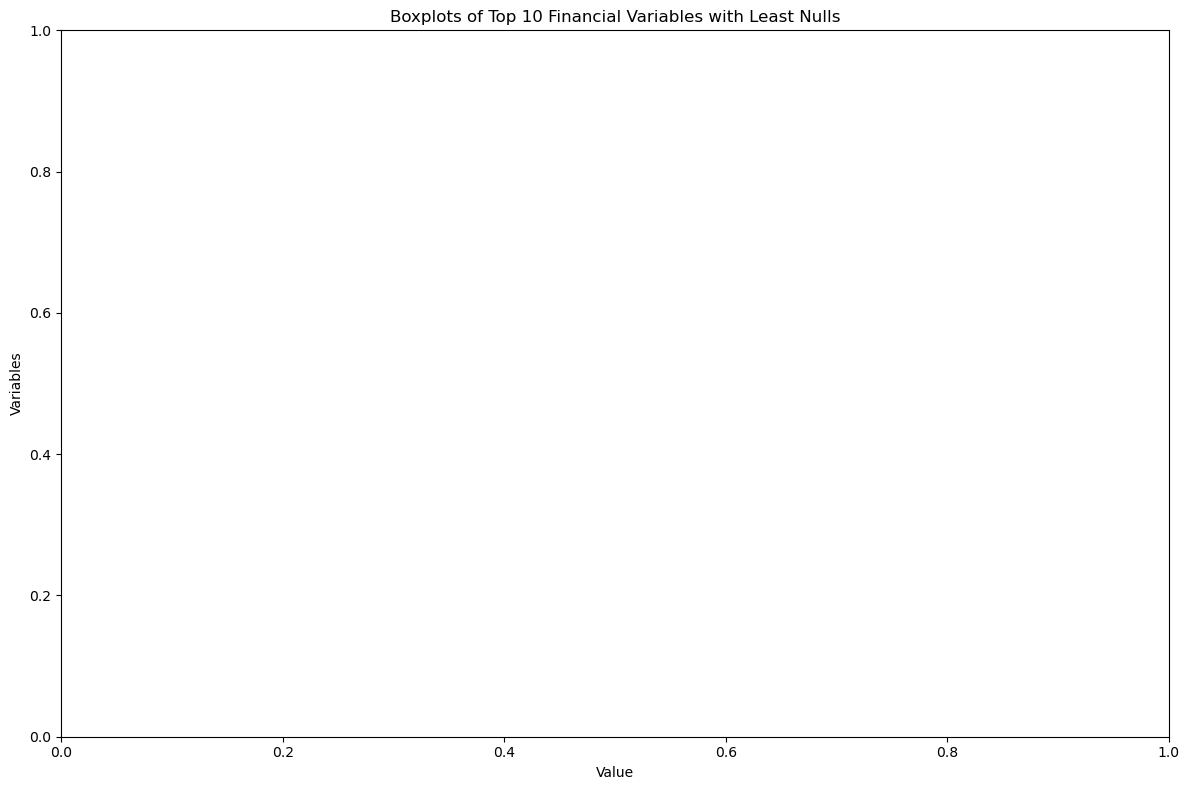

ValueError: Found array with 0 sample(s) (shape=(0, 4000)) while a minimum of 1 is required by StandardScaler.

In [9]:
top_cols_threshold = 4000
# Select the top x columns with the least amount of nulls (excluding original keys)
# top_columns = columns_stats_df.head(top_cols_threshold)['column'].tolist()

top_columns = columns_stats_df.head(top_cols_threshold)['column'].tolist()

data_to_plot = df[top_columns]

# Drop rows with nulls in these columns
data_to_plot = data_to_plot.dropna(subset=top_columns)

# Ensure all columns are numeric
numeric_columns = data_to_plot.select_dtypes(include=[np.number]).columns.tolist()


data_to_plot = data_to_plot[numeric_columns]

# Check if we have at least one numeric column
if not numeric_columns:
    print("No numeric columns found among the top 10 columns.")
else:

    print(f"\nDense submatrix shape: {data_to_plot.shape}")
    # Plot boxplots without standardization
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data_to_plot, orient='h')
    plt.title('Boxplots of Top 10 Financial Variables with Least Nulls')
    plt.xlabel('Value')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()


    # Standardize the data for better comparison if scales vary widely
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(data_to_plot), columns=numeric_columns)

    # Plot standardized boxplots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=data_scaled, orient='h')
    plt.title('Standardized Boxplots of Top 10 Financial Variables with Least Nulls')
    plt.xlabel('Standardized Value')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()



In [ ]:
print('shape before drop', df.shape)
# df = df.dropna()
# df = df.dropna(axis='columns')
# df.shape

shape before drop (40829, 10077)


(20491, 16)


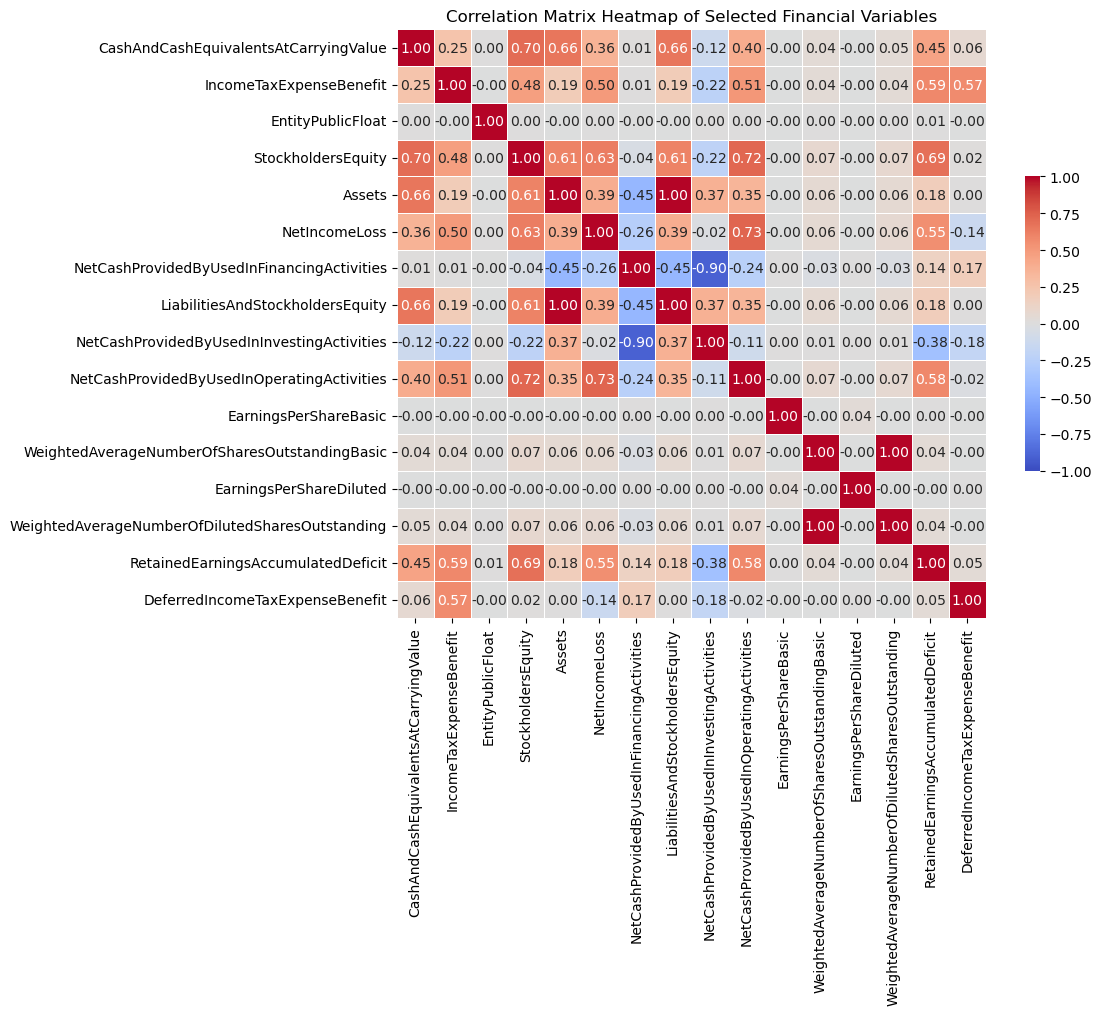

In [ ]:
max_null_percentage = 22.0 

# Filter columns that meet the threshold
selected_columns = columns_stats_df[columns_stats_df['percentage_nulls'] <= max_null_percentage]['column'].tolist()

# Ensure we only consider numeric columns
numeric_columns = df[selected_columns].select_dtypes(include=[np.number]).columns.tolist()

# Drop rows with nulls in the selected columns
data_for_correlation = df[numeric_columns].dropna()
print(data_for_correlation.shape)


# Check if there are enough variables to compute correlations
if len(numeric_columns) < 2:
    print("Not enough numeric columns with the specified null percentage threshold to compute correlations.")
else:
    # Compute the correlation matrix
    corr_matrix = data_for_correlation.corr('pearson')
    
    plt.figure(figsize=(12, 10))

    # Generate a mask for the upper triangle (optional)
    # mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # add below with mask = mask

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_matrix, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
                square=True, linewidths=.5, annot=True, fmt='.2f', cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix Heatmap of Selected Financial Variables')
    plt.tight_layout()
    plt.show()





# TODO: add constraint for for "10-K" on date matching.
# combine with: https://zenodo.org/records/10667088 and check if the data is correct (10k annual)

